In [17]:
# pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sentence_transformers import SentenceTransformer
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [24]:
model = SentenceTransformer("clip-ViT-B-32")

Loading weights:   0%|          | 0/398 [00:00<?, ?it/s]

CLIPModel LOAD REPORT from: C:\Users\hp\.cache\huggingface\hub\models--sentence-transformers--clip-ViT-B-32\snapshots\327ab6726d33c0e22f920c83f2ff9e4bd38ca37f\0_CLIPModel
Key                                  | Status     |  | 
-------------------------------------+------------+--+-
text_model.embeddings.position_ids   | UNEXPECTED |  | 
vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [25]:
image_path = r"C:\Users\hp\OneDrive\Documents\cat.jpeg"

In [26]:
img1 = Image.open(image_path)

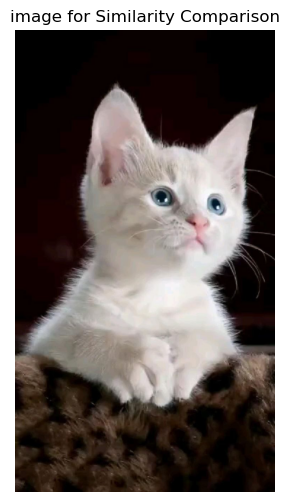

In [27]:
plt.figure(figsize=(6,6))
plt.imshow(img1)
plt.axis("off")
plt.title("image for Similarity Comparison")
plt.show()

In [28]:
text = ["Two dogs in the snow","Two cats fighting in the garden","A dog sleeping on a couch"," a happy dog playing fetch","a picture of London at night","a cat on a table"]

In [29]:
len(text)

6

In [30]:
def display_image_and_compare(image_path, text):
    # 1. Load image
    img = Image.open(image_path)

    # 2. Encode text and image
    text_emb = model.encode(text)
    img_emb = model.encode(img)

    # 3. Compute similarity score (FIXED)
    similarity_score = np.dot(text_emb, img_emb.T)

    # 4. Best match
    best_match_index = np.argmax(similarity_score)
    best_match_desc = text[best_match_index]

    # 5. Show result
    print(
        f"\nBest match for the image is '{best_match_desc}', "
        f"with a score of {similarity_score[best_match_index]}"
    )

    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Image for Similarity Comparison")
    plt.show()


Best match for the image is 'a cat on a table', with a score of 26.902971267700195


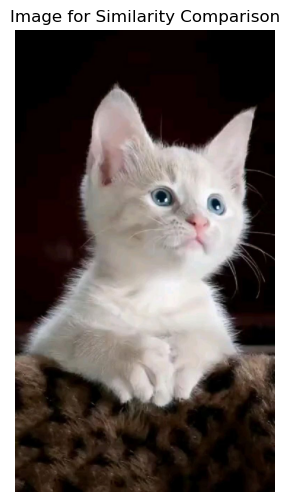

In [31]:
image_path = r"C:\Users\hp\OneDrive\Documents\cat.jpeg" 

display_image_and_compare(image_path, text)

In [32]:
def display_image_and_compare(image_path2, text):
    # 1. Load image
    img = Image.open(image_path2)

    # 2. Encode text and image
    text_emb = model.encode(text)
    img_emb = model.encode(img)

    # 3. Compute similarity score (FIXED)
    similarity_score = np.dot(text_emb, img_emb.T)

    # 4. Best match
    best_match_index = np.argmax(similarity_score)
    best_match_desc = text[best_match_index]

    # 5. Show result
    print(
        f"\nBest match for the image is '{best_match_desc}', "
        f"with a score of {similarity_score[best_match_index]}"
    )

    # Display image
    plt.figure(figsize=(6,6))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Image for Similarity Comparison")
    plt.show()

In [33]:
image_path2 = r"C:\Users\hp\OneDrive\Documents\angrycat.jpeg"


Best match for the image is 'a cat on a table', with a score of 28.963586807250977


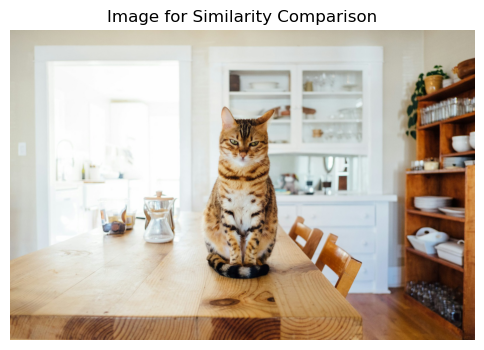

In [34]:
display_image_and_compare(image_path2, text)


Best match for the image is 'A dog sleeping on a couch', with a score of 27.368858337402344


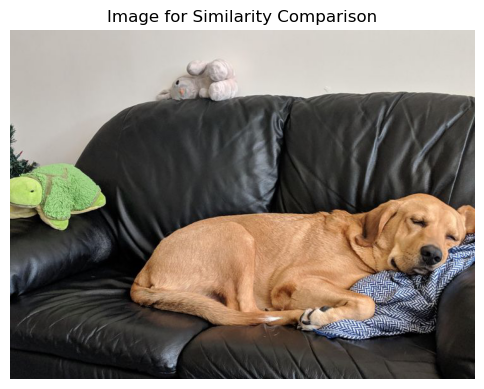

In [37]:
dog_image = r"C:\Users\hp\OneDrive\Documents\sleeping dog.jpeg"
display_image_and_compare(dog_image, text)


Best match for the image is 'an icecream seller', with a score of 27.562076568603516


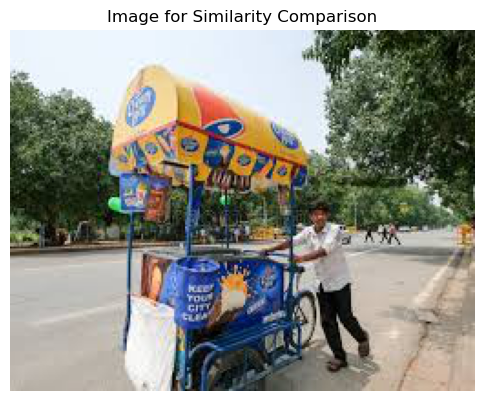

In [38]:
desc = ["A baby is laughing","a baby is craying","a boy is playing cricket","a teacher in the classroom","an icecream seller"]
ice_cream =  r"C:\Users\hp\OneDrive\Documents\seller.jpeg"
display_image_and_compare(ice_cream,desc)